# Sentiment Analysis using VADER

In [3]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Kyle/nltk_data...


In [38]:
# Example 

text = 'This was a good movie.'
vader_scores = sid.polarity_scores(text)

print(vader_scores)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


Data comes from more than 34,000 customer reviews available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/version/5?select=1429_1.csv). We use the rating, text, and title columns.  

In [6]:
import pandas as pd

df = pd.read_csv("data/review_data.csv") 

In [13]:
df.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


There are two ways to apply this code to each item in the data frame. 
1. Using `.apply()` and an anonymous function (`lambda`). Traditional approach to applying a function to a data frame. 
2. List comprehension. Slightly faster and more "Pythonic".

In both cases, we need to convert all the text in the column to `str`. 

In [40]:
# Option 1 with .apply() method

%%time
df['scores_apply'] = df["reviews.text"].apply(lambda text: sid.polarity_scores(str(text)))

CPU times: user 16.3 s, sys: 83.4 ms, total: 16.4 s
Wall time: 16.5 s


In [41]:
#Option 2 with list comprehension

%%time
df['scores_list_comprehension'] = [sid.polarity_scores(str(i)) for i in df["reviews.text"]]

CPU times: user 16.1 s, sys: 66.5 ms, total: 16.2 s
Wall time: 16.2 s


In [23]:
df.head()

,reviews.rating,reviews.text,reviews.title,scores
0,5.0,This product so far has not disappointed. My c...,Kindle,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp..."
1,5.0,great for beginner or experienced person. Boug...,very fast,"{'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp..."
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp..."
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"{'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co..."
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp..."


We now have two new columns that contain a dictionary of the Vader Polarity scores. We need to extract the dictionary and move this into columns so we can use the data using `scores = df['scores'].apply(pd.Series)` then use `pd.concat()` to join the `scores` data frame with the origional data frame.

In [83]:
scores = df['scores_list_str'].apply(pd.Series)
df = pd.concat([df, df['scores'].apply(pd.Series)], axis=1)
df["Category"] = df["reviews.rating"].astype("category")
df.head()

,reviews.rating,reviews.text,reviews.title,scores,scores_apply,scores_list,scores_list_str,B,neg,neu,pos,compound,neg,neu,pos,compound,Category
0,5.0,This product so far has not disappointed. My c...,Kindle,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...","{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...","{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",This product so far has not disappointed. My c...,5.0,0.000,0.599,0.401,0.9194,0.000,0.599,0.401,0.9194,5.0
1,5.0,great for beginner or experienced person. Boug...,very fast,"{'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp...","{'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp...","{'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp...",great for beginner or experienced person. Boug...,5.0,0.000,0.483,0.517,0.8934,0.000,0.483,0.517,0.8934,5.0
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...","{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...","{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",Inexpensive tablet for him to use and learn on...,5.0,0.000,0.896,0.104,0.4404,0.000,0.896,0.104,0.4404,5.0
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"{'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co...","{'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co...","{'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co...",I've had my Fire HD 8 two weeks now and I love...,4.0,0.036,0.683,0.281,0.9884,0.036,0.683,0.281,0.9884,4.0
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...","{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...","{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...",I bought this for my grand daughter when she c...,5.0,0.000,0.914,0.086,0.7876,0.000,0.914,0.086,0.7876,5.0


In [84]:
df.dropna(inplace=True)

In [88]:
df = pd.concat([df,pd.get_dummies(df["Category"])], axis = 1)

<AxesSubplot:>

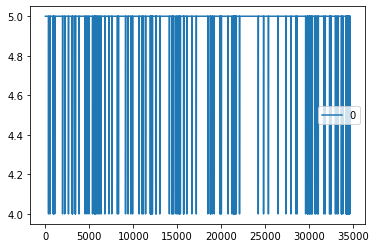

In [78]:
pred.plot()